# Data Analysis - all data

In this notebook, we analyzed the combined data resulting from the three experiments conducted with the "**AR**ound the world" app in 3 schools in San Sebastian, Spain. The data includes both the raw data compiled from the app and the student surveys. There are two types of students based on the device they use during the experiment: users who used the app from a PC (they can see what other students do and provide suggestions, and replace AR content with 3D objects from a Three.js canvas) or mobile (users with a tablet or cellphone, they can also receive questions from the teacher and answer them).

After the trial, the students were given a survey consisting of a number of questions, which they had to rate from 1 to 5. There were 16 common questions, 2 questions phrased slightly differently for mobile/PC users, and 2 questions only for mobile users.

## Student surveys

In this section we will analyse the student surveys that were completed after the experiment. 
This is the full list of questions:

1. I think that I would like to use the application frequently.
2. I found the application to be simple.
3. I thought the application was easy to use.
4. I think that I could use the application without the support of a technical person.
5. I found the various functions in the application were well integrated
6. I would imagine that most people would learn to use the application very quickly.
7. I found the application very intuitive.
8. I felt very confident using the application.
9. I could use the application without having to learn anything new.
10. I would like to use the application during a test
11. Being able to provide suggestions made me feel more involved
12. Receiving suggestions made me more confident when answering a question
13. At all times I have been able to understand what the person who had to respond to the exercise was doing
14. I find it more interesting to solve the exercises through the application than through a web page or in writing
15. Suggestions from my classmates have helped me when answering the exercise
16. The device used  has allowed me to use the application easily
17. I would like to use the application to learn new concepts
18. Being able to use augmented reality / 3D elements makes the application more entertaining
19. There are several ways to collaborate with my classmates through the application
20. Thanks to augmented reality / 3D elements I have felt immersed in the learning activity

Questions #12 and #15 only appeared in the questionnaires filled by students using a mobile device, since students on a PC did not have the possibility to answer questions through the app or receive suggestions.

The 2 questions phrased differently are #18 and #20, where the words "augmented reality" were used in the questionnaires filled by the students using a mobile device, and "3D elements" in case of students on PC.


In [1]:
# If you want to use help from chatGPT, uncomment the following line
%load_ext ask_ai.magics
# make sure that you have stored your OpenAI API key in the variable OPENAI_API_KEY

In [2]:
# And import the necessary libraries. xapi_analysis is the package we created to help analysing xapi statements
from xapi_analysis.input_csv import *
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Set, List, Union
import matplotlib.pyplot as plt

# Let's also set some useful display constants for pandas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500

# And something for plotting better images, too.
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 18     # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 13    # legend fontsize
plt.rcParams['font.size'] = 13
cmap_cont = sns.color_palette('crest', as_cmap=True)
cmap_disc = sns.color_palette('colorblind')

In [3]:
SURVEY_FILE = Path('./questionnaire_answers.xlsx')
SHEET_NAMES = ['SALESIANOS', 'DEUSTO', 'ZUBIRI_MANTEO']
NUM_ROWS = 22
COLS = [list(range(4, 21)), list(range(4, 14)), list(range(4, 21))]

frames = []
for idx, s in enumerate(SHEET_NAMES):
    frames.append(pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAMES[idx], nrows=NUM_ROWS, usecols=COLS[idx]))
    
survey_answers = pd.concat(frames, axis=1)
survey_answers.index += 1 # so index value is the same as the question number
survey_answers = survey_answers.astype('Int64')

questions = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAMES[0], nrows=NUM_ROWS, usecols=[2])
questions.index += 1 # so index value is the same as the question number

Let's have a quick look at the data

In [4]:
survey_answers.head()

,iPad1,iPad2,Tablet1,Tablet2,iPhone1,Android1,Android2,Android3,Android4,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009,iPad101,Tablet101,Tablet102,iPhone101,iPhone102,Android101,Android102,Android103,Android104,PC010,iPad202,Tablet201,Tablet202,iPhone201,iPhone202,Android201,Android202,Android203,Android204,PC021,PC022,PC023,PC024,PC025,PC026,PC028,PC029
1,3,3,4,5,3,5,4,3,3,3,3,3,3,1,4,3,4,4,3,4,4,4,3,4,4,3,1,3,3,4,4,3,5,1,4,4,5,3,1,4,3,5,4,5
2,4,4,5,4,3,2,3,3,3,4,4,4,3,2,4,4,5,5,4,4,4,5,4,4,5,3,3,5,4,5,5,5,5,4,4,5,4,3,5,5,2,3,5,4
3,4,3,4,4,3,4,3,3,4,5,4,3,2,1,4,4,5,4,4,4,4,4,3,4,4,4,4,5,4,5,5,5,5,4,4,5,5,2,5,5,5,5,5,4
4,5,4,3,4,5,4,2,2,4,5,4,4,4,1,3,4,5,3,4,4,4,4,3,5,3,3,4,5,4,5,4,5,5,5,5,5,5,3,5,5,2,4,4,3
5,5,4,4,4,3,5,4,3,3,4,4,4,4,2,3,4,5,4,4,4,4,4,2,4,4,5,3,4,3,3,4,4,4,3,5,5,5,4,4,5,4,5,4,3


In [5]:
survey_answers.describe()

,iPad1,iPad2,Tablet1,Tablet2,iPhone1,Android1,Android2,Android3,Android4,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009,iPad101,Tablet101,Tablet102,iPhone101,iPhone102,Android101,Android102,Android103,Android104,PC010,iPad202,Tablet201,Tablet202,iPhone201,iPhone202,Android201,Android202,Android203,Android204,PC021,PC022,PC023,PC024,PC025,PC026,PC028,PC029
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,4.15,4.0,4.2,3.9,3.6,3.9,3.7,3.35,3.65,4.055556,4.222222,4.055556,3.833333,2.333333,3.888889,4.222222,4.777778,4.0,3.9,4.1,3.7,4.4,3.1,4.4,4.25,3.75,2.666667,4.4,3.35,3.7,4.4,4.3,4.4,2.75,4.5,4.8,4.833333,3.944444,4.666667,4.777778,3.611111,4.333333,4.555556,3.722222
std,0.67082,0.794719,0.695852,0.718185,0.940325,1.020836,1.031095,0.67082,0.933302,0.872604,0.732084,1.055642,0.857493,1.084652,1.02262,0.548319,0.427793,0.648886,0.640723,0.552506,0.864505,0.820783,0.718185,0.502625,0.638666,0.966546,1.283378,0.820783,1.03999,1.174286,0.502625,0.656947,0.680557,1.585294,0.688247,0.410391,0.383482,0.872604,0.970143,0.427793,1.092159,0.766965,0.51131,0.751904
min,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,1.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,2.0,1.0,4.0,2.0,3.0,4.0,2.0
25%,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,3.75,4.0,3.0,4.0,3.0,4.0,4.0,3.0,1.25,4.0,3.0,2.75,4.0,4.0,4.0,1.0,4.0,5.0,5.0,3.25,5.0,5.0,3.0,4.0,4.0,3.0
50%,4.0,4.0,4.0,4.0,3.5,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,5.0,3.5,4.0,4.0,4.0,4.5,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.5,5.0,4.0
75%,5.0,4.25,5.0,4.0,4.0,5.0,4.25,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.75,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,4.25,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.75,5.0,5.0,4.0,5.0,5.0,4.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


We also classified questions into four different groups (**Collaboration**, **Functionality**, **Usability**, **Educational**). Let's specify which questions belong to each group

In [6]:
collab = [1, 11, 12, 13, 15, 19]
functi = [5]
usabil = [2, 3, 4, 6, 7, 8, 9, 16]
educat = [10, 14, 17, 18, 20]

Before we plot the distribution of the answers per question, we need to sum the answers. We will have a new dataframe, with one row per question, and in the columns the percentage of answer in each category (**Strongly disagree**, **Disagree**, **Neutral**, **Agree**, **Strongly agree**)

In [7]:
df = survey_answers.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df.columns = ['SD', 'D', 'N', 'A', 'SA']
df.head()

,SD,D,N,A,SA
1,4,0,18,16,6
2,0,3,9,18,14
3,1,2,6,21,14
4,1,3,8,17,15
5,0,2,9,24,9


In [45]:
def stacked_barplot_100(df: Union[pd.DataFrame, pd.Series], # input dataframe
                        title: str=None,  # title of the plot,
                        q_idx: List=None  # index of questions
                        ):
    """
    Creates a 100% stacked bar plot to visualize the answers of the student survey.
    The input dataframe MUST have the columns SD, D, N, A, SA which represents the number of answers
    to a specific value in the Likert scale 
    """
    ax = plt.gca()
    
    ind = [x for x, _ in enumerate(df.index)]
    
    if q_idx is not None:
        df['Question_idx'] = q_idx
    else:
        df['Question_idx'] = list(range(1,21))
    df = df.sort_values(['Question_idx'], ascending=False)

    strongdisagree = df.SD
    disagree = df.D
    neutral = df.N
    agree = df.A
    strongagree = df.SA

    #calculate the percentages for the 100% stacked bars
    total = strongdisagree+disagree+neutral+agree+strongagree
    prop_strongdisagree = np.true_divide(strongdisagree, total) * 100
    prop_disagree = np.true_divide(disagree, total) * 100
    prop_neutral = np.true_divide(neutral, total) * 100
    prop_agree = np.true_divide(agree, total) * 100
    prop_strongagree = np.true_divide(strongagree, total) * 100

    #plot the bars
    ax.barh(ind, prop_strongagree, label='SA', color='#1b617b',
             left=prop_strongdisagree+prop_disagree+prop_neutral+prop_agree)
    ax.barh(ind, prop_agree, label='A', color='#879caf',
             left=prop_strongdisagree+prop_disagree+prop_neutral)
    ax.barh(ind, prop_neutral, label='N', color='#e7e7e7', left=prop_strongdisagree+prop_disagree)
    ax.barh(ind, prop_disagree, label='D', color='#e28e8e', left=prop_strongdisagree)
    ax.barh(ind, prop_strongdisagree, label='SD', color='#c71d1d') 

    #set the axes
    plt.yticks(ind, df.index)
    plt.ylabel("Question index")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlim=1.2

    #fine tune the labels
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.grid(color='black', linestyle='-', axis="x", linewidth=1)
    ax.set_facecolor('white')
    plt.tick_params(labelsize=16)

    plt.show()

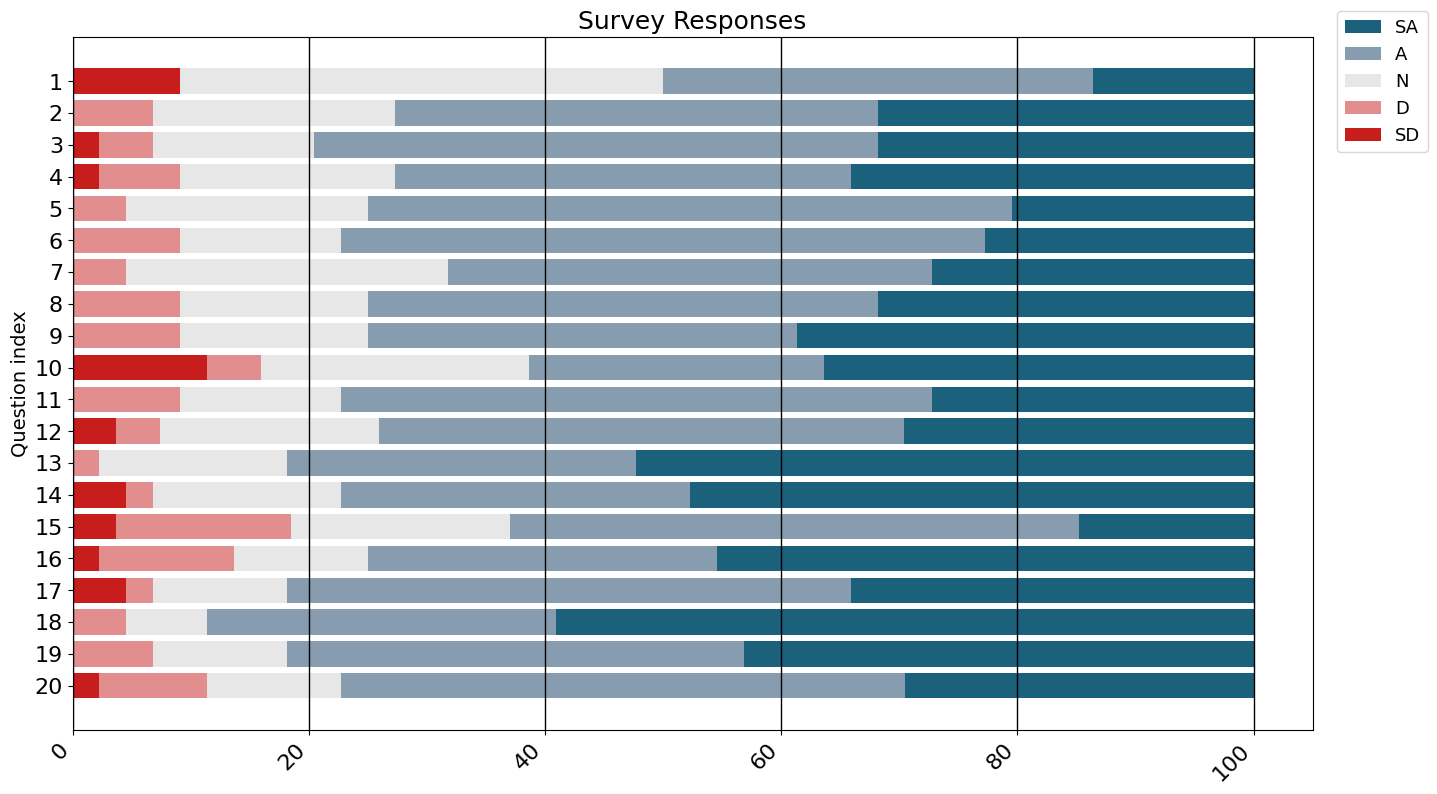

In [19]:
stacked_barplot_100(df, "Survey Responses")

It seems that the majority of users answered **agree** or **strongly agree** to all the questions.
Let's have a look at the dataset with the percentages, too:

In [10]:
cols=['SA','A','N','D','SD']
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

df[cols] = df[cols].round(2)
df.insert(loc=0, column='Question', value=questions)
df = df.sort_values(['Question_idx'], ascending=True)
df.drop('Question_idx', axis=1)

,Question,SD,D,N,A,SA
1,I think that I would like to use the application frequently.,9.09,0.0,40.91,36.36,13.64
2,I found the application to be simple.,0.0,6.82,20.45,40.91,31.82
3,I thought the application was easy to use.,2.27,4.55,13.64,47.73,31.82
4,I think that I could use the application without the support of a technical person.,2.27,6.82,18.18,38.64,34.09
5,I found the various functions in the application were well integrated,0.0,4.55,20.45,54.55,20.45
6,I would imagine that most people would learn to use the application very quickly.,0.0,9.09,13.64,54.55,22.73
7,I found the application very intuitive.,0.0,4.55,27.27,40.91,27.27
8,I felt very confident using the application.,0.0,9.09,15.91,43.18,31.82
9,I could use the application without having to learn anything new.,0.0,9.09,15.91,36.36,38.64
10,I would like to use the application during a test,11.36,4.55,22.73,25.0,36.36


Now we will repeat the same analysis, but with the results split in several ways:

* By school / age group
* By role (active user vs. suggestions only)
* By question type

In [31]:
group_14_yrs = survey_answers.iloc[:, 1:17]
group_17_yrs = survey_answers.iloc[:, 27:44]
group_19_yrs = survey_answers.iloc[:, 17:27]

group_active = survey_answers[survey_answers.columns.drop(list(survey_answers.filter(regex='PC')))]
group_watchers = survey_answers.filter(like='PC').drop(index=[12, 15]) # the questions only for active users

group_collab = survey_answers.filter(items=collab, axis=0)
group_functi = survey_answers.filter(items=functi, axis=0)
group_educat = survey_answers.filter(items=educat, axis=0)
group_usabil = survey_answers.filter(items=usabil, axis=0)

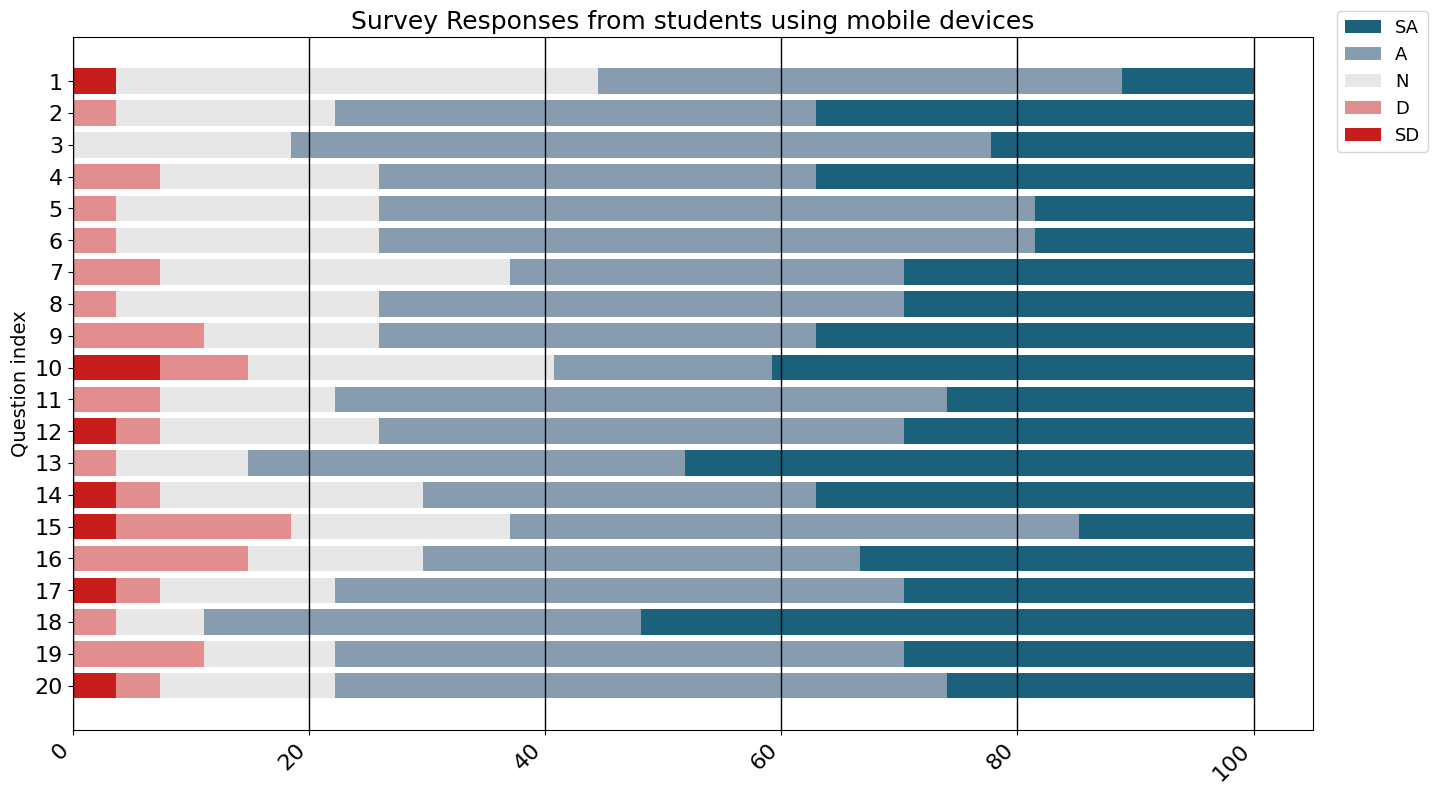

In [20]:
df_active = group_active.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_active.columns = ['SD', 'D', 'N', 'A', 'SA']
df_watchers = group_watchers.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_watchers.columns = ['SD', 'D', 'N', 'A', 'SA']
q_idx_watchers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20]

stacked_barplot_100(df_active, "Survey Responses from students using mobile devices")

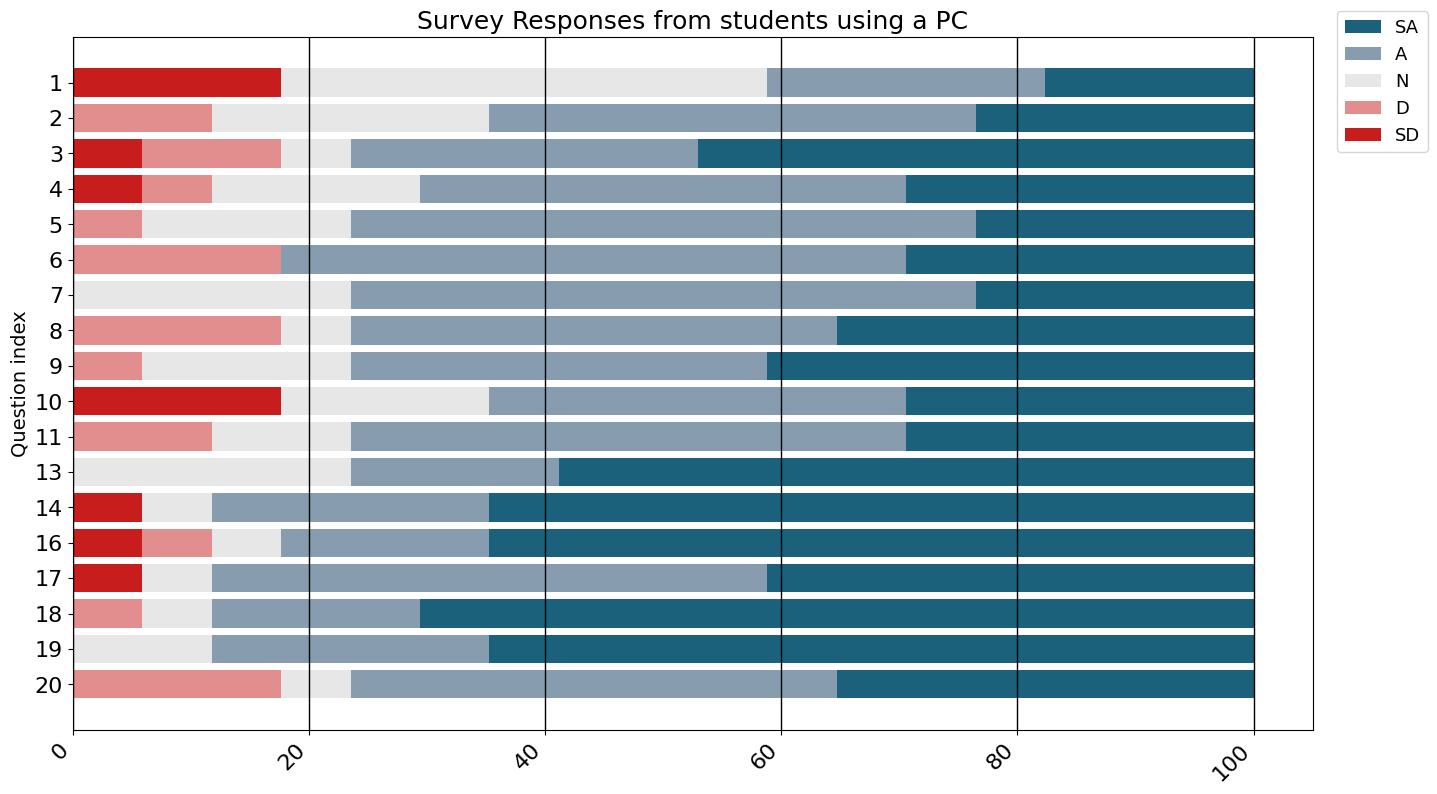

In [21]:
stacked_barplot_100(df_watchers, "Survey Responses from students using a PC", q_idx_watchers)

For the users on a PC the questions 12 and 15 are missing, since these question did not appear in their questionnaire. While the trend is similar, it looks like that active users (the ones using a mobile device and experiencing AR content) answered in a slightly more positive fashion. We will have a clearer idea when plotting the mean answer. 

Now, repeat the process for the other groups. First we plot by school:

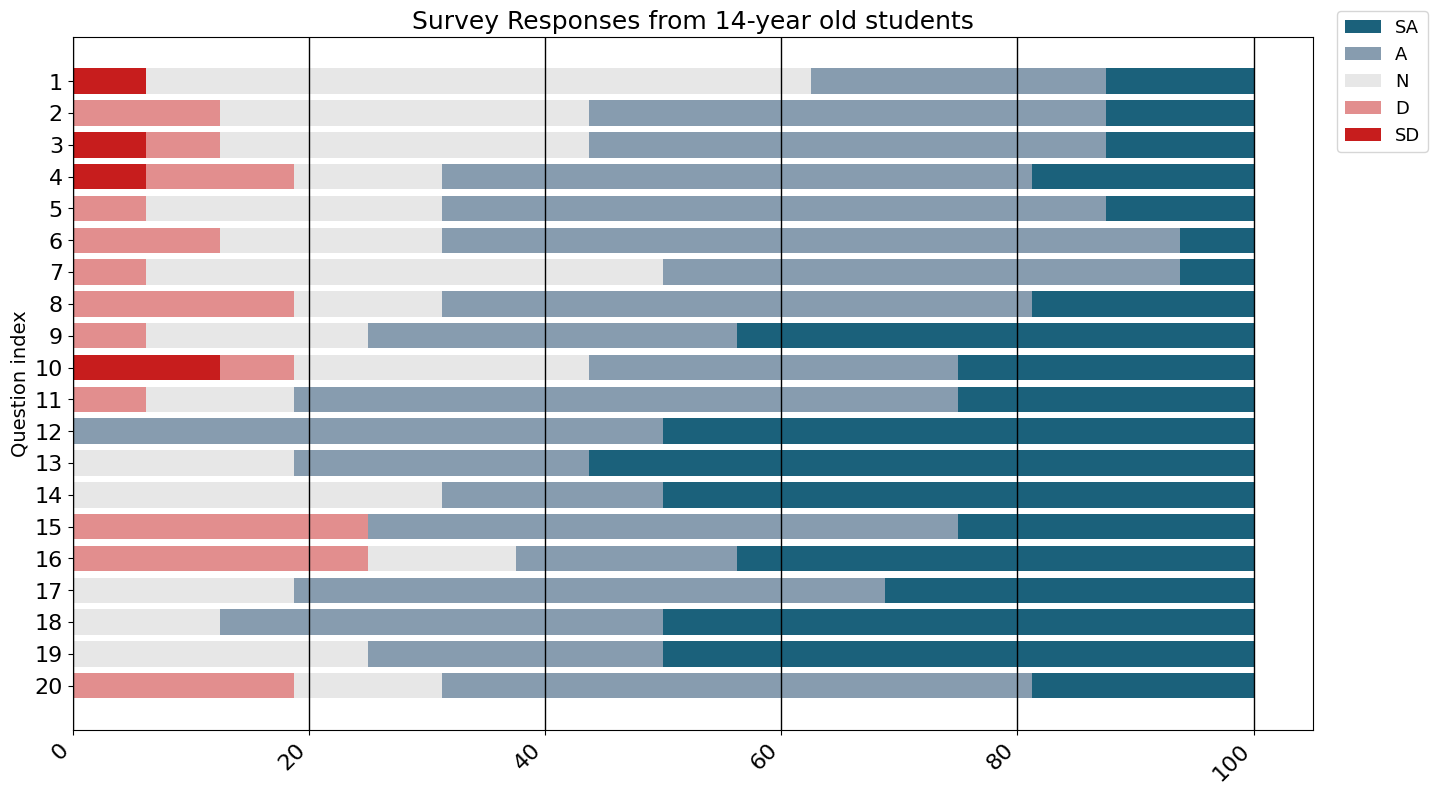

In [33]:
df_14yrs = group_14_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_14yrs.columns = ['SD', 'D', 'N', 'A', 'SA']
df_17yrs = group_17_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_17yrs.columns = ['SD', 'D', 'N', 'A', 'SA']
df_19yrs = group_19_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_19yrs.columns = ['SD', 'D', 'N', 'A', 'SA']

stacked_barplot_100(df_14yrs, "Survey Responses from 14-year old students")

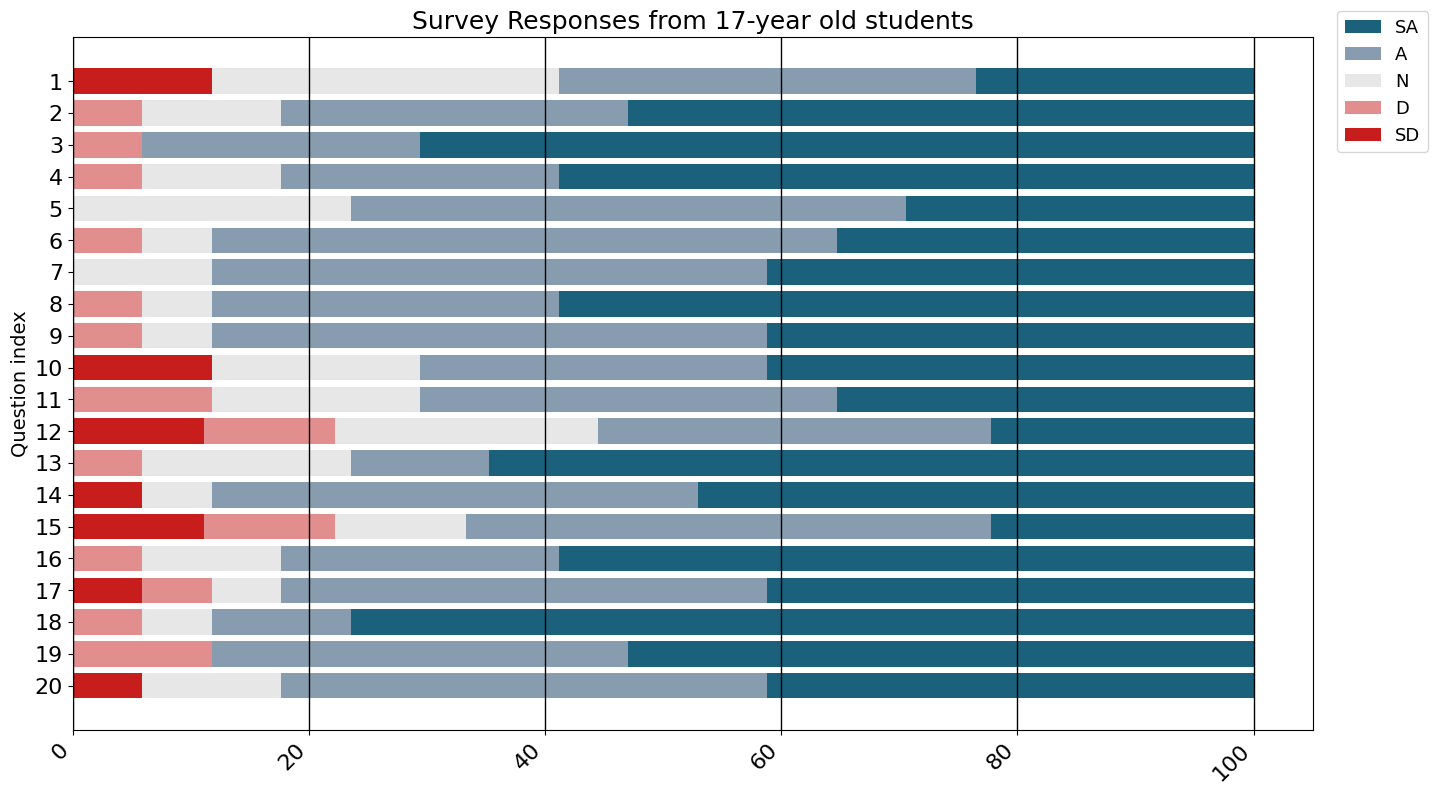

In [36]:
stacked_barplot_100(df_17yrs, "Survey Responses from 17-year old students")

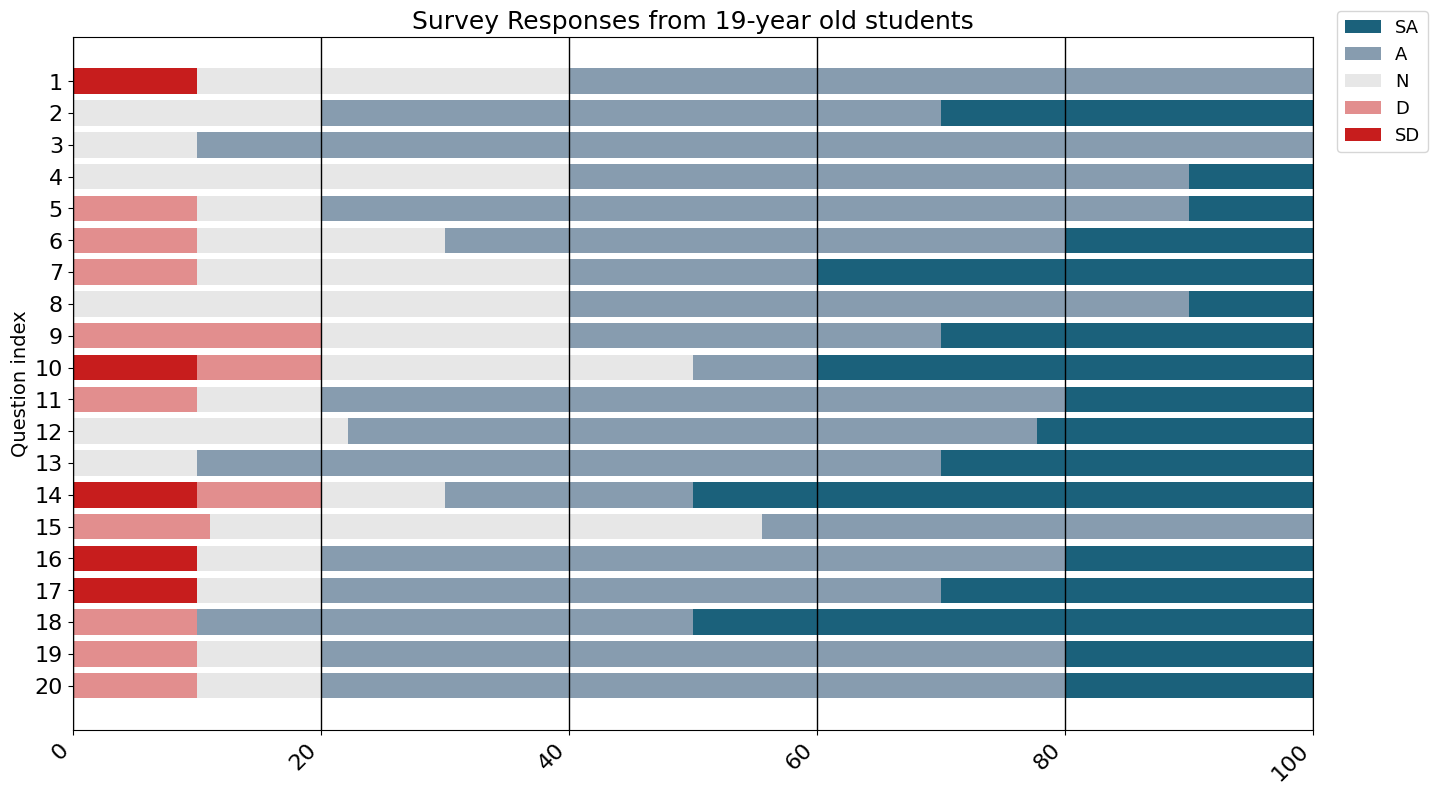

In [37]:
stacked_barplot_100(df_19yrs, "Survey Responses from 19-year old students")

Again, while the trend is similar, it seems that younger students enjoyed the application more.

Let's check now the results but split by question type. In this case we have filtered the data by row, so we group the results like before, but then we sum over the columns to get the aggregated results per question type:

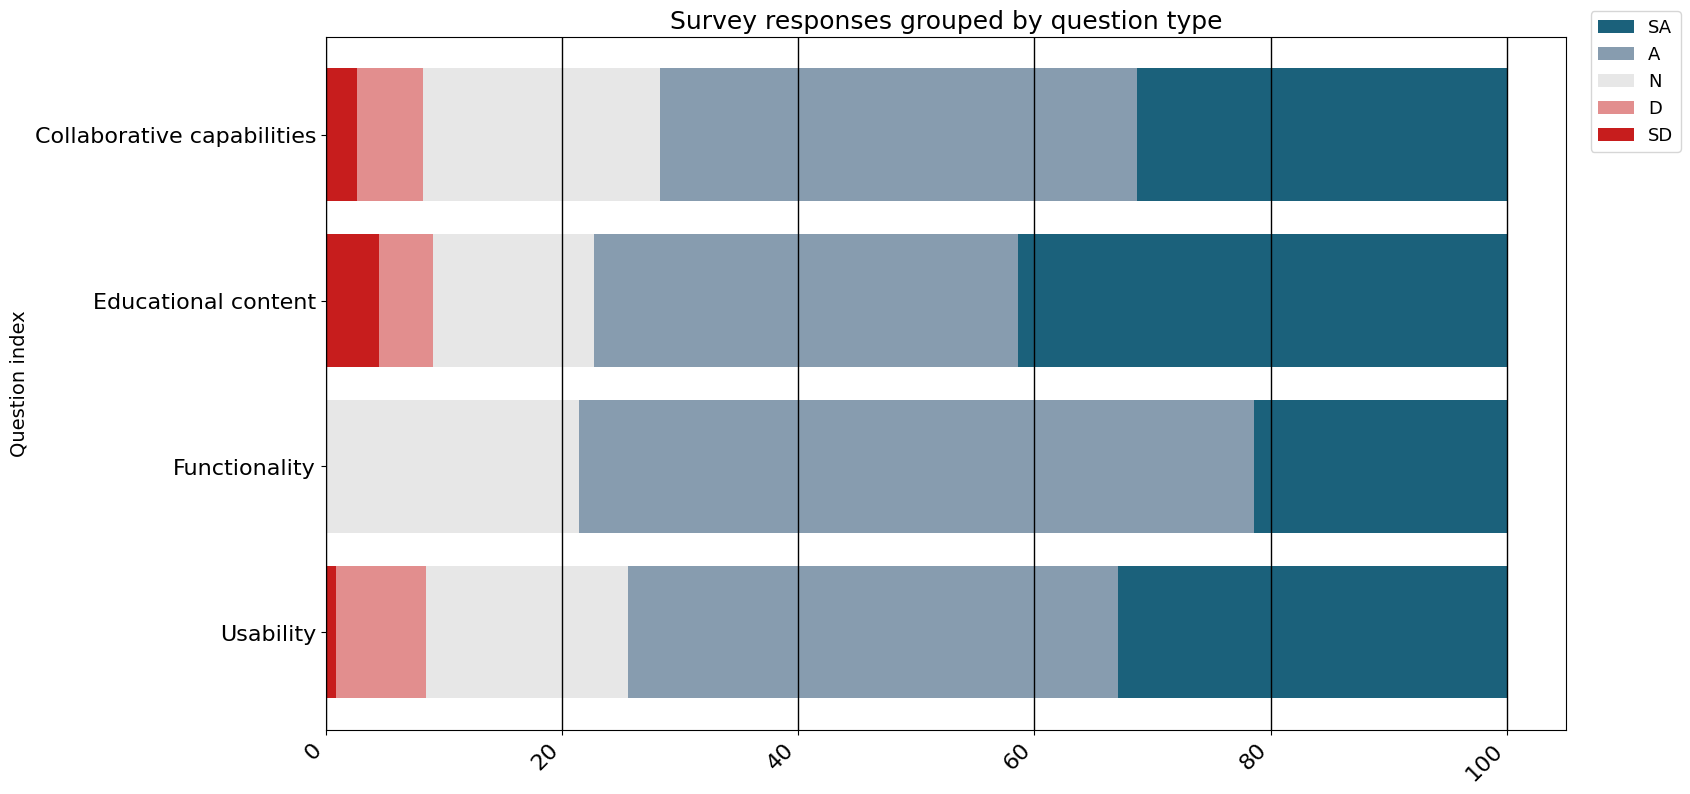

In [67]:
df_tmp = group_collab.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_collab = df_tmp.sum(axis=0)

df_tmp = group_functi.apply(pd.Series.value_counts, axis=1)[[3, 4, 5]].fillna(0)
df_tmp.columns = ['N', 'A', 'SA']
s_functi = df_tmp.sum(axis=0)
s_functi['SD'] = 0
s_functi['D'] = 0

df_tmp = group_educat.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_educat = df_tmp.sum(axis=0)

df_tmp = group_usabil.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_usabil = df_tmp.sum(axis=0)

df_q_types = pd.concat([s_collab, s_functi, s_educat, s_usabil], axis=1).transpose()
df_q_types.index = ['Collaborative capabilities', 'Functionality', 'Educational content', 'Usability']
df_q_types

stacked_barplot_100(df_q_types, "Survey responses grouped by question type", df_q_types.index)

Let's now analyse the 